<a href="https://colab.research.google.com/github/poonachaka/skill/blob/main/Wavelet_on_EEG15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Wavelet on EEG**

In [ ]:
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 39.0 MB/s eta 0:00:00


Saving S002R02.edf to S002R02 (5).edf
Extracting EDF parameters from /content/S002R02.edf...
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 9759  =      0.000 ...    60.994 secs...


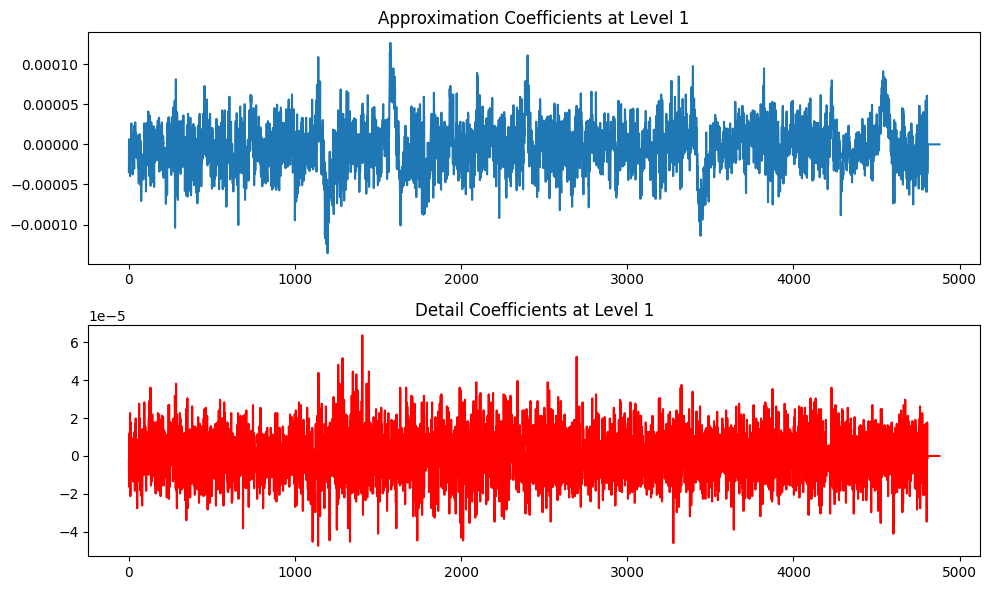

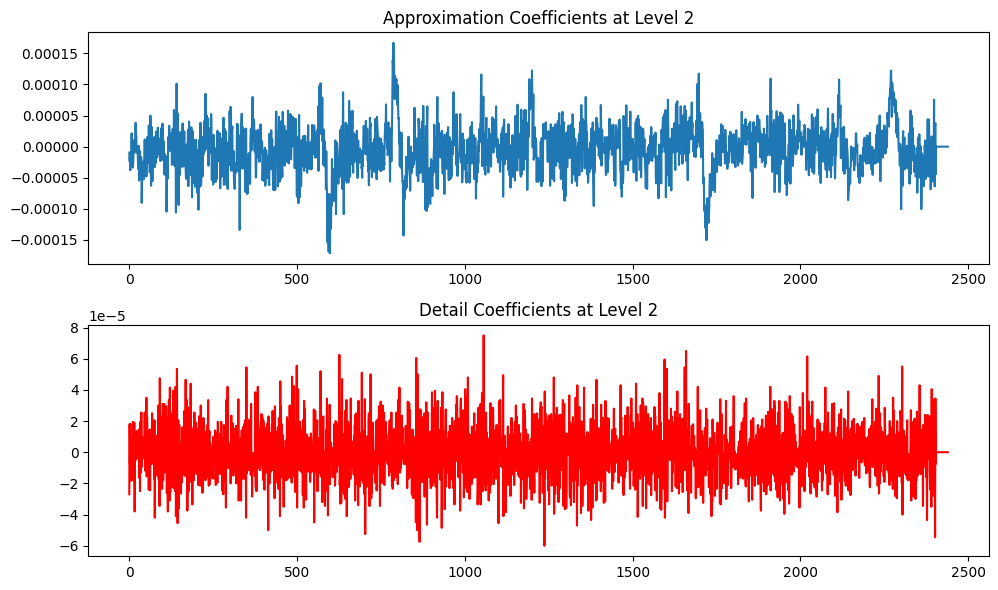

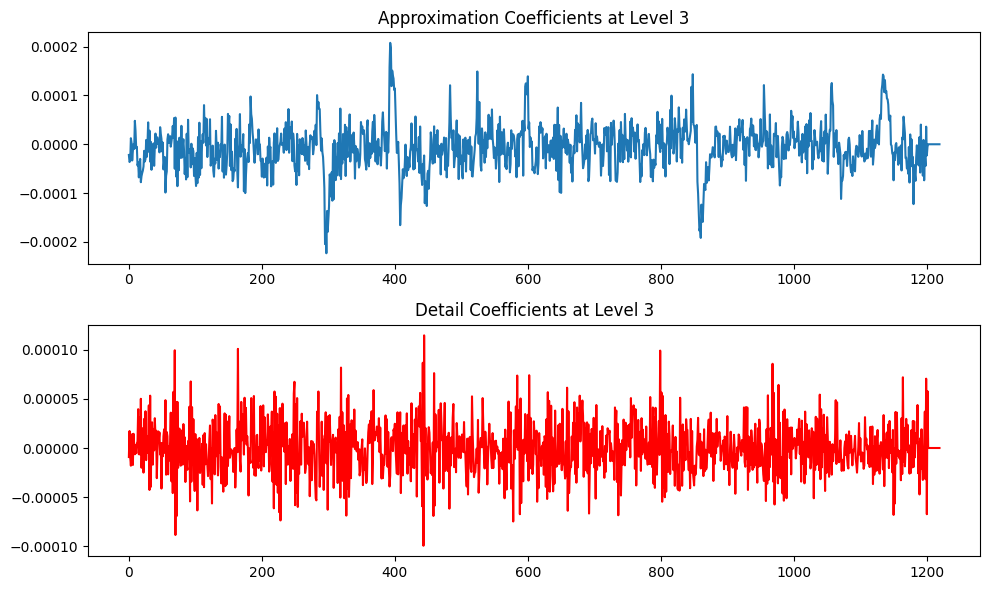

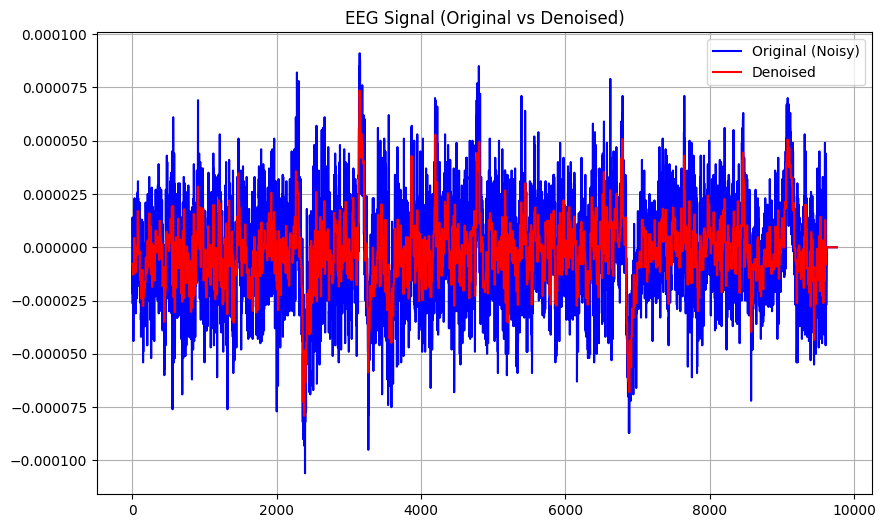

MSE (EEG): 0.0000000002478609759221311


In [ ]:
from google.colab import files
files.upload()
import numpy as np
import matplotlib.pyplot as plt
import pywt
import scipy.io
import mne

# Read EDF file
raw = mne.io.read_raw_edf('/content/S002R02.edf', preload=True)

eeg_signal = raw.get_data(picks=[0])[0]

l1 = h1 = None
l2 = h2 = None
l3 = h3 = None

yy = eeg_signal.copy()


# Perform 3 levels of DWT
for i in range(1, 4):
  CA, CD = pywt.dwt(yy, 'db1', mode='sym')

  if i == 1:
    l1, h1 = CA, CD
  elif i == 2:
    l2, h2 = CA, CD
  else:
    l3, h3 = CA, CD

  yy = CA

  plt.figure(figsize=(10, 6))
  plt.subplot(2, 1, 1)
  plt.plot(CA)
  plt.title(f'Approximation Coefficients at Level {i}')

  plt.subplot(2, 1, 2)
  plt.plot(CD, 'r')
  plt.title(f'Detail Coefficients at Level {i}')

  plt.tight_layout()
  plt.show()

# Thresholding
thres = 1.5
h1[np.abs(h1) < thres] = 0
h2[np.abs(h2) < thres] = 0
h3[np.abs(h3) < thres] = 0

# Reconstruction
ll2 = pywt.idwt(l3, h3, 'db1', mode='sym')
ll1 = pywt.idwt(ll2, h2, 'db1', mode='sym')
xx = pywt.idwt(ll1, h1, 'db1', mode='sym')

# Plot Original vs Denoised
plt.figure(figsize=(10, 6))
plt.plot(eeg_signal, 'b', label='Original (Noisy)')
plt.plot(xx, 'r', label='Denoised')
plt.legend()
plt.title('EEG Signal (Original vs Denoised)')
plt.grid(True)
plt.show()

# Compute MSE
MSE = np.mean((eeg_signal - xx)**2)
print(f'MSE (EEG): {MSE:.25f}')